<a href="https://colab.research.google.com/github/jtao/tamids/blob/master/QuickStart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis and Machine Learning

Basic steps in carrying out a machine larning project:
1. Data cleaning and formatting
2. Exploratory data analysis
3. Feature engineering and selection
4. Compare several machine learning models on a performance metric
5. Perform hyperparameter tuning on the best model
6. Evaluate the best model on the testing set
7. Interpret the model results
8. Draw conclusions and document work

### 1. Data Preparation

In [73]:
# import modules
import pandas as pd
import numpy as np
!pip install pandas-profiling
import pandas_profiling

In [0]:
# absolute path of the data file

# University Information
data_file='https://raw.githubusercontent.com/jtao/tamids/master/bootcamp2019/data/schoolInfo.json'

# New York Jobs
#data_file='https://raw.githubusercontent.com/jtao/tamids/master/bootcamp2019/data/nyc-jobs.csv'

# data of interest (column name)

doi = 'cost-after-aid'

In [0]:
# Read in data into a dataframe 


# CSV file
#data = pd.read_csv(data_file)

# json file
data = pd.read_json(data_file)

In [75]:
# check column information and make sure the key columns 
# are numerical numbers.
#data.info()
data.describe()
pandas_profiling.ProfileReport(data)

# if not, use astype method to convert.
#data[col] = data[col].astype(float) 

Number of variables,39
Number of observations,311
Total Missing (%),20.0%
Total size in memory,88.5 KiB
Average record size in memory,291.3 B
Numeric,13
Categorical,9
Boolean,2
Date,0
Text (Unique),3
Rejected,12


In [72]:
# display the first 5 rows of the dataframe.
data.head(5)

,acceptance-rate,act-avg,aliasNames,businessRepScore,city,cost-after-aid,displayName,engineeringRepScore,enrollment,hs-gpa-avg,institutionalControl,isPublic,nonResponder,nonResponderText,overallRank,percent-receiving-aid,primaryKey,primaryPhoto,primaryPhotoThumb,ranking,rankingDisplayName,rankingDisplayRank,rankingDisplayScore,rankingIsTied,rankingMaxPossibleScore,rankingNoteCharacter,rankingNoteText,rankingRankStatus,rankingSortRank,rankingType,region,sat-avg,schoolType,sortName,state,tuition,urlName,xwalkId,zip
0,7.0,32.0,None,NaN,Princeton,16793.0,Princeton University,4.1,5400.0,3.9,private,True,False,None,1,60.0,2627,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,overall,National Universities,#1,100.0,False,NaN,NaN,NaN,ranked,1,national-universities,NaN,1400.0,national-universities,princetonuniversity,NJ,47140,princeton-university,186131,8544
1,5.0,32.0,None,NaN,Cambridge,16338.0,Harvard University,3.6,6710.0,4.0,private,True,False,None,2,55.0,2155,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,overall,National Universities,#2,98.0,False,NaN,NaN,NaN,ranked,2,national-universities,NaN,1430.0,national-universities,harvarduniversity,MA,48949,harvard-university,166027,2138
2,8.0,32.0,UChicago,NaN,Chicago,27767.0,University of Chicago,NaN,5941.0,4.0,private,True,False,None,3,42.0,1774,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,overall,National Universities,#3,96.0,True,NaN,NaN,NaN,ranked,3,national-universities,NaN,1450.0,national-universities,universityofchicago,IL,54825,university-of-chicago,144050,60637
3,6.0,32.0,None,NaN,New Haven,18385.0,Yale University,3.4,5472.0,NaN,private,True,False,None,3,50.0,1426,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,overall,National Universities,#3,96.0,True,NaN,NaN,NaN,ranked,3,national-universities,NaN,1420.0,national-universities,yaleuniversity,CT,51400,yale-university,130794,6520
4,6.0,32.0,None,NaN,New York,21041.0,Columbia University,3.8,6113.0,NaN,private,True,False,None,5,48.0,2707,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,overall,National Universities,#5,95.0,True,NaN,NaN,NaN,ranked,5,national-universities,NaN,1430.0,national-universities,columbiauniversity,NY,57208,columbia-university,190150,10027


### 2. Exploratory Data Analysis

In [0]:
import matplotlib.pyplot as plt

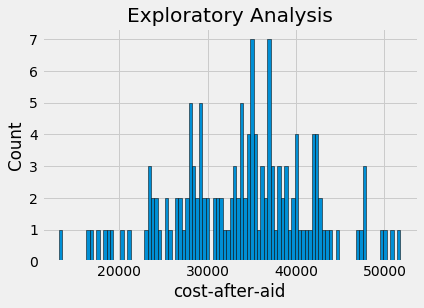

In [55]:
plt.style.use('fivethirtyeight')
plt.hist(data[doi].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel(doi); plt.ylabel('Count'); 
plt.title('Exploratory Analysis');

In [56]:
# Find all correlations with the score and sort 
correlations_data = data.corr()[doi].sort_values()
correlations_data

percent-receiving-aid     -0.419085
rankingDisplayScore       -0.418525
sat-avg                   -0.408720
act-avg                   -0.375214
engineeringRepScore       -0.157731
xwalkId                   -0.140591
hs-gpa-avg                -0.093653
businessRepScore          -0.074852
tuition                   -0.051745
primaryKey                 0.126230
enrollment                 0.232098
rankingIsTied              0.256549
zip                        0.269866
overallRank                0.282787
rankingSortRank            0.282787
acceptance-rate            0.368985
cost-after-aid             1.000000
isPublic                        NaN
nonResponder                    NaN
rankingMaxPossibleScore         NaN
rankingNoteCharacter            NaN
rankingNoteText                 NaN
region                          NaN
Name: cost-after-aid, dtype: float64

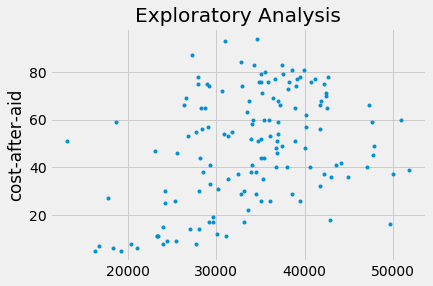

In [58]:
plt.ylabel(doi);
x=data[doi]
y=data["acceptance-rate"]
plt.title('Exploratory Analysis');
plt.plot(x, y, '.')

### 3. Feature Engineering and Selection

In [0]:
# work on a copy of the original data
features = data.copy()

In [0]:
# select only the numerical values
num_subset = features.select_dtypes('number')

In [61]:
num_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 20 columns):
acceptance-rate            302 non-null float64
act-avg                    291 non-null float64
businessRepScore           234 non-null float64
cost-after-aid             143 non-null float64
engineeringRepScore        206 non-null float64
enrollment                 300 non-null float64
hs-gpa-avg                 244 non-null float64
overallRank                311 non-null int64
percent-receiving-aid      143 non-null float64
primaryKey                 311 non-null int64
rankingDisplayScore        230 non-null float64
rankingMaxPossibleScore    0 non-null float64
rankingNoteCharacter       0 non-null float64
rankingNoteText            0 non-null float64
rankingSortRank            311 non-null int64
region                     0 non-null float64
sat-avg                    291 non-null float64
tuition                    311 non-null int64
xwalkId                    311 non-null int64
z

In [0]:
# Select the categorical columns
categorical_subset = data[[doi, "acceptance-rate"]]

In [0]:
# One hot encode
categorical_subset=pd.get_dummies(categorical_subset)

In [0]:
features = pd.concat([num_subset, categorical_subset], axis = 1)

In [65]:
features

,acceptance-rate,act-avg,businessRepScore,cost-after-aid,engineeringRepScore,enrollment,hs-gpa-avg,overallRank,percent-receiving-aid,primaryKey,rankingDisplayScore,rankingMaxPossibleScore,rankingNoteCharacter,rankingNoteText,rankingSortRank,region,sat-avg,tuition,xwalkId,zip,cost-after-aid,acceptance-rate
0,7.0,32.0,NaN,16793.0,4.1,5400.0,3.9,1,60.0,2627,100.0,NaN,NaN,NaN,1,NaN,1400.0,47140,186131,8544,16793.0,7.0
1,5.0,32.0,NaN,16338.0,3.6,6710.0,4.0,2,55.0,2155,98.0,NaN,NaN,NaN,2,NaN,1430.0,48949,166027,2138,16338.0,5.0
2,8.0,32.0,NaN,27767.0,NaN,5941.0,4.0,3,42.0,1774,96.0,NaN,NaN,NaN,3,NaN,1450.0,54825,144050,60637,27767.0,8.0
3,6.0,32.0,NaN,18385.0,3.4,5472.0,NaN,3,50.0,1426,96.0,NaN,NaN,NaN,3,NaN,1420.0,51400,130794,6520,18385.0,6.0
4,6.0,32.0,NaN,21041.0,3.8,6113.0,NaN,5,48.0,2707,95.0,NaN,NaN,NaN,5,NaN,1430.0,57208,190150,10027,21041.0,6.0
5,8.0,33.0,4.6,20331.0,4.9,4524.0,NaN,5,58.0,2178,95.0,NaN,NaN,NaN,5,NaN,1460.0,49892,166683,2139,20331.0,8.0
6,5.0,31.0,NaN,19296.0,4.8,7034.0,NaN,5,47.0,1305,95.0,NaN,NaN,NaN,5,NaN,1380.0,49617,243744,94305,19296.0,5.0
7,9.0,32.0,4.8,25441.0,3.6,10019.0,3.9,8,47.0,3378,93.0,NaN,NaN,NaN,8,NaN,1380.0,53534,215062,19104,25441.0,9.0
8,11.0,31.0,NaN,23374.0,3.7,6609.0,NaN,9,41.0,2920,92.0,NaN,NaN,NaN,9,NaN,1380.0,53744,198419,27708,23374.0,11.0
9,8.0,34.0,NaN,23973.0,4.6,979.0,NaN,10,51.0,1131,91.0,NaN,NaN,NaN,10,NaN,1510.0,49908,110404,91125,23973.0,8.0
